In [1]:
!pip install pmdarima


In [2]:
#importar libresias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [3]:
# Configurar visualización
plt.style.use('ggplot')

In [4]:
# Cargar los datos desde el archivo Excel
file_path = "C:/Users/gonza/OneDrive/Desktop/machine learning/Sales_Data.xlsx"
xls = pd.ExcelFile(file_path)

In [5]:
# Leer la primera hoja del archivo Excel
df = pd.read_excel(xls, sheet_name=xls.sheet_names[0])

# Mostrar las primeras filas
df.head()

,Order Date,Sales
0,2015-01-01,14205.707
1,2015-02-01,4519.892
2,2015-03-01,55205.797
3,2015-04-01,27906.855
4,2015-05-01,23644.303


In [6]:
#Convertir la columna "Order Date" a formato datetime y establecerla como índice
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.set_index('Order Date', inplace=True)


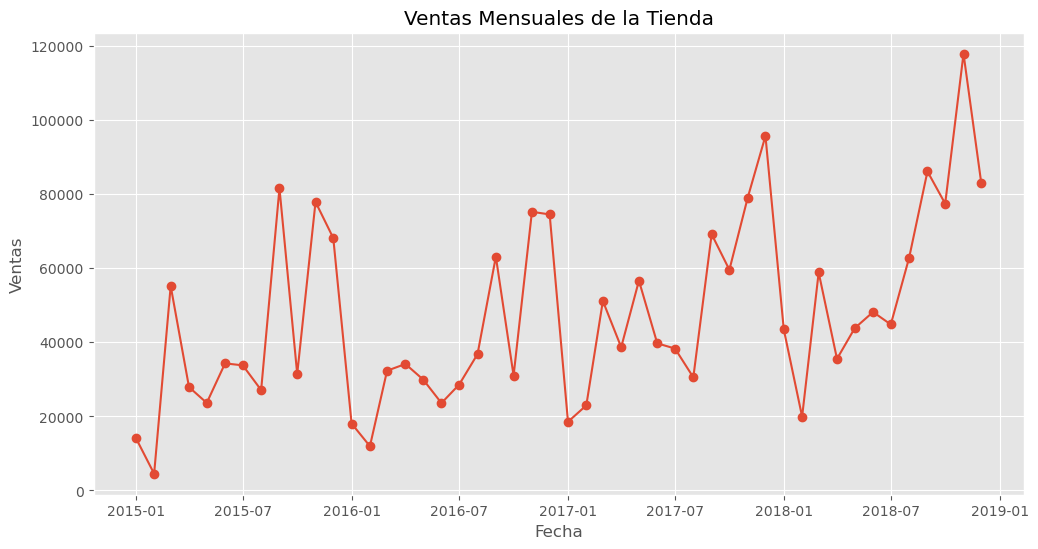

In [7]:
#Visualizar la serie de tiempo
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Sales'], marker='o', linestyle='-')
plt.title('Ventas Mensuales de la Tienda')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.grid(True)
plt.show()


In [ ]:
#El gráfico muestra la evolución de las ventas mensuales de la tienda. Se observa una variabilidad significativa y posibles patrones estacionales

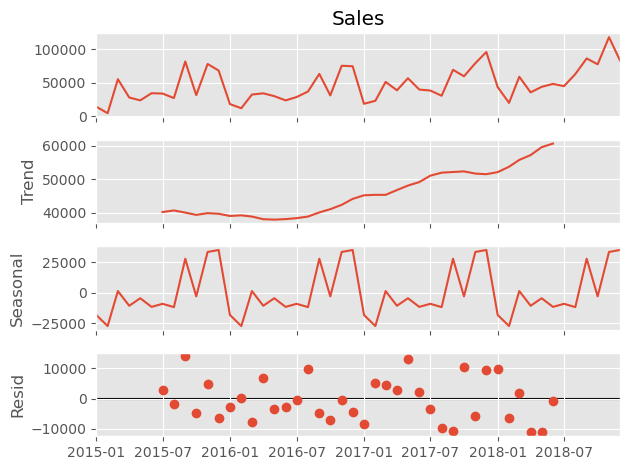

In [8]:
#Realizar la descomposición de la serie de tiempo:
decomposition = sm.tsa.seasonal_decompose(df['Sales'], model='additive', period=12)
decomposition.plot()
plt.show()


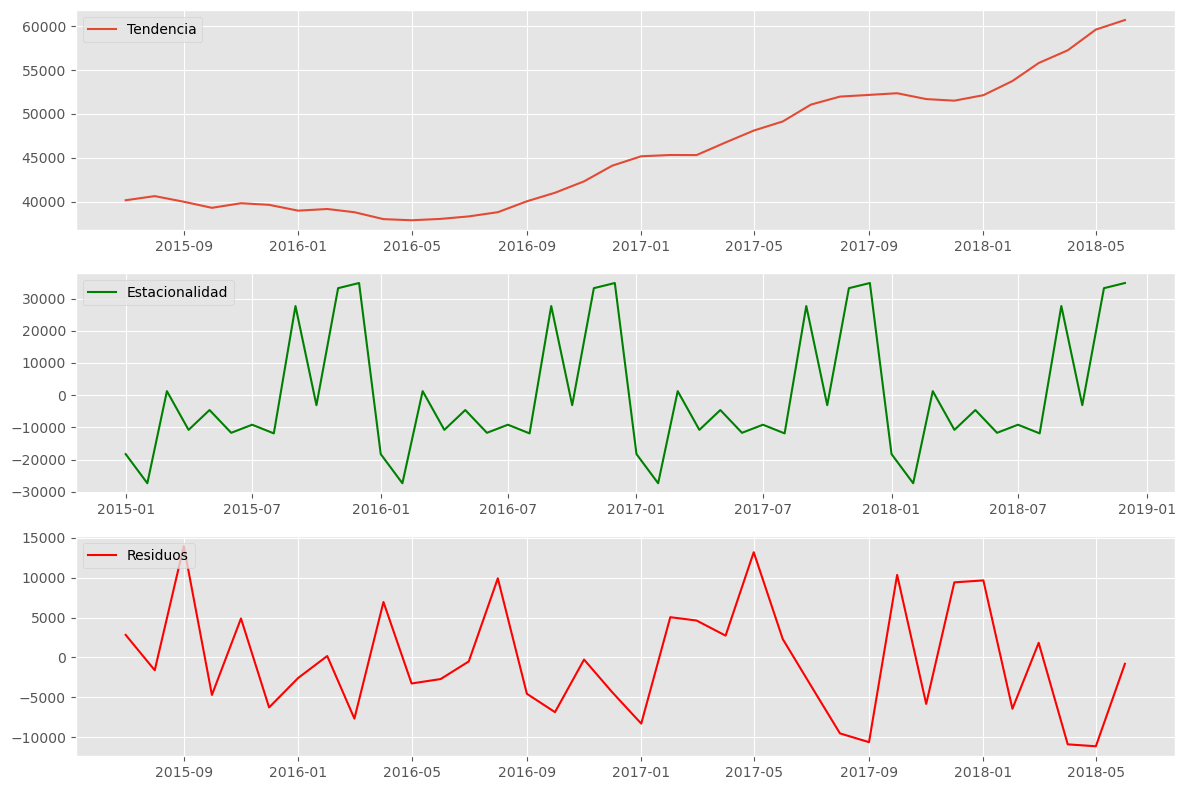

In [82]:
# Descomposición de la serie de tiempo usando descomposición estacional
decomposition = sm.tsa.seasonal_decompose(df['Sales'], model='additive', period=12)

# Graficar los componentes descompuestos
plt.figure(figsize=(12, 8))

# Tendencia
plt.subplot(3, 1, 1)
plt.plot(decomposition.trend, label='Tendencia')
plt.legend(loc='upper left')

# Estacionalidad
plt.subplot(3, 1, 2)
plt.plot(decomposition.seasonal, label='Estacionalidad', color='green')
plt.legend(loc='upper left')

# Residuos
plt.subplot(3, 1, 3)
plt.plot(decomposition.resid, label='Residuos', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
#La descomposición de la serie de tiempo muestra:
#Tendencia: Se observa una fluctuación en las ventas a lo largo del tiempo, con períodos de crecimiento y caída.
#Estacionalidad: Existe un patrón estacional claro que se repite cada 12 meses, lo cual indica una periodicidad anual en las ventas.
#Residuos: Los residuos parecen ser relativamente aleatorios, aunque con algunas fluctuaciones.

In [9]:
#Determinar si la serie es estacionaria usando el test de Dickey-Fuller:
adf_test = adfuller(df['Sales'])
print(f"Estadístico ADF: {adf_test[0]}")
print(f"P-valor: {adf_test[1]}")
print(f"Valores críticos: {adf_test[4]}")

Estadístico ADF: -4.41613676143077
P-valor: 0.00027791039276670493
Valores críticos: {'1%': -3.5778480370438146, '5%': -2.925338105429433, '10%': -2.6007735310095064}


In [ ]:
#Dado que el p-valor es menor a 0.05, podemos rechazar la hipótesis nula, lo que significa que la serie ya es estacionaria y no requiere diferenciación (𝑑=0).

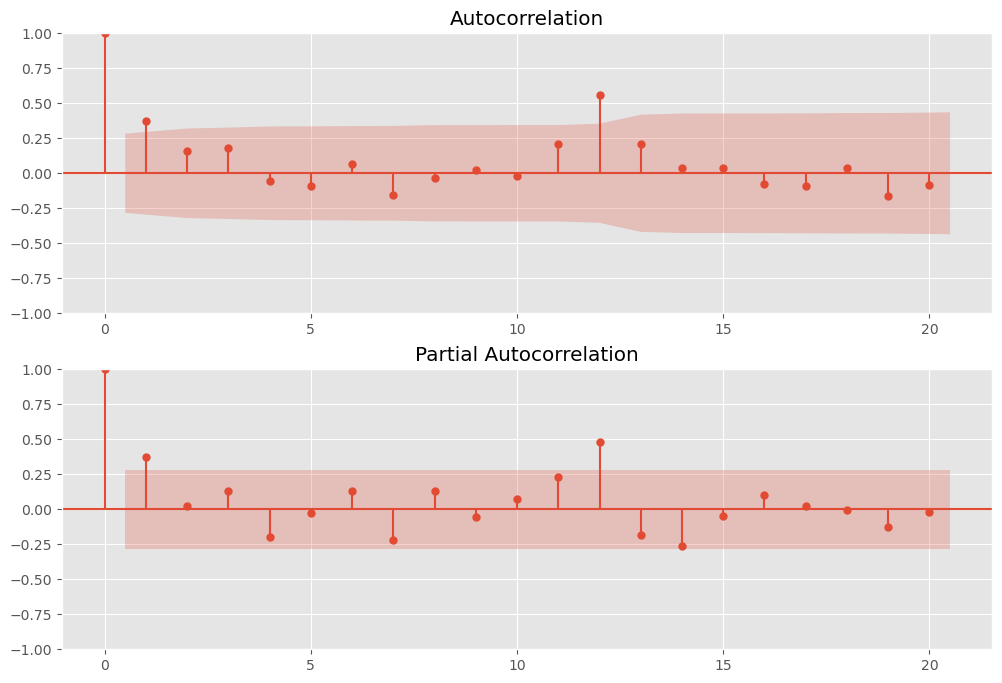

In [10]:
#Determinar los valores de p y 𝑞 usando ACF y PACF:
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df['Sales'], ax=ax[0], lags=20)  # Función de autocorrelación
plot_pacf(df['Sales'], ax=ax[1], lags=20) # Función de autocorrelación parcial
plt.show()

In [12]:
# concluciones de las metricas obtenidas El término AR (p=1) es significativo, lo que sugiere que las ventas pasadas afectan las futuras.El término MA (q=1) no es significativo, lo que sugiere que el término de media móvil podría eliminarse.

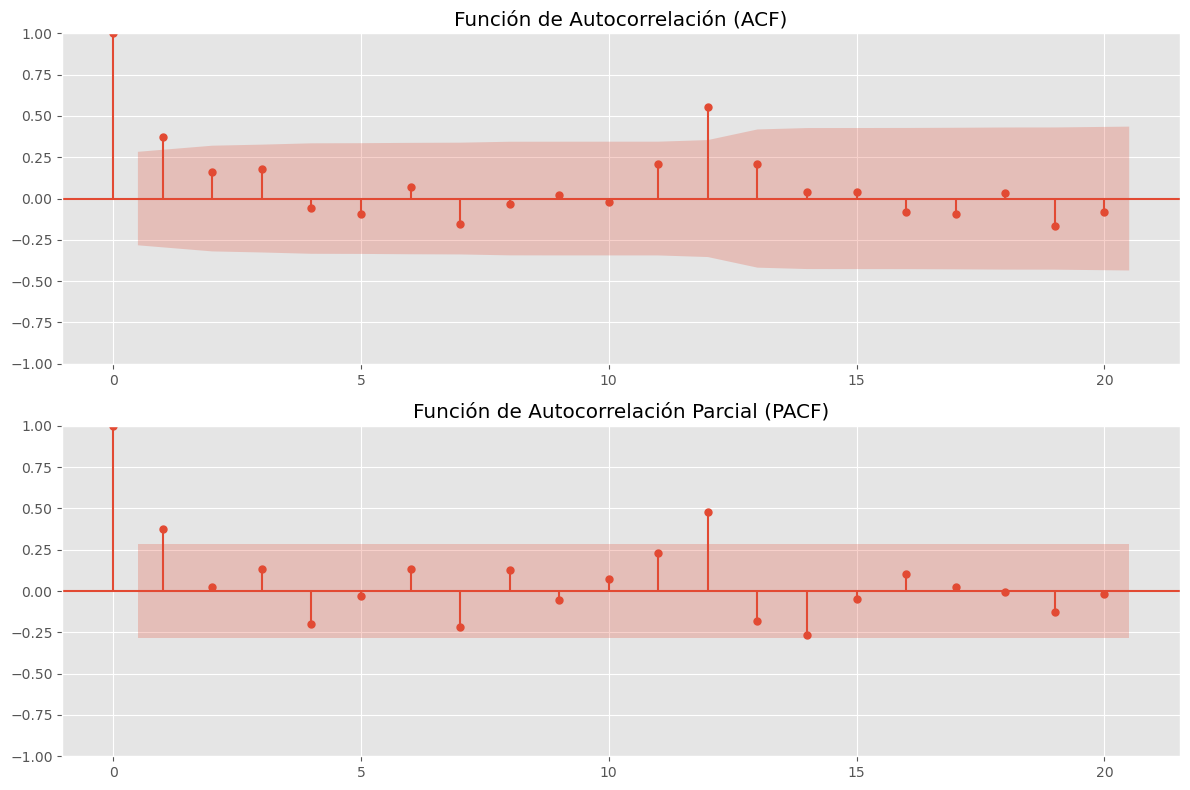

In [13]:
# Graficar ACF y PACF para identificar p y q
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# ACF (Autocorrelación)
plot_acf(df['Sales'], ax=ax[0], lags=20)
ax[0].set_title("Función de Autocorrelación (ACF)")

# PACF (Autocorrelación Parcial)
plot_pacf(df['Sales'], ax=ax[1], lags=20)
ax[1].set_title("Función de Autocorrelación Parcial (PACF)")

plt.tight_layout()
plt.show()


In [14]:
#Análisis del ACF (Autocorrelación)en la ACF (primer gráfico), se observa que el primer rezago es positivo y significativo, y después los valores caen dentro de la banda sombreada (zona no significativa).Esto indica que hay una posible estructura de media móvil (MA) en la serie, sugiriendo que 𝑞=1 o 𝑞=2 podría ser adecuado.

In [15]:
#Análisis del PACF (Autocorrelación Parcial)En la PACF (segundo gráfico), el primer rezago es significativo y el resto cae dentro de la banda sombreada.Esto sugiere que la serie tiene un componente autorregresivo de primer orden.Basado en esto, 𝑝=1parece ser una buena elección.


In [16]:
#Selección de Parámetros para ARIMA,según la interpretación de ACF y PACF:𝑝=1(porque la PACF cae después del primer rezago).d=0 (según el test de Dickey-Fuller, la serie ya es estacionaria).q=1 o q=2 (porque la ACF sugiere una estructura de media móvil).Por lo tanto, un modelo ARIMA(1,0,1) o ARIMA(1,0,2) podría ser adecuado.



In [17]:
# Ajustar modelo  ARIMA(1,0,1)
from statsmodels.tsa.arima.model import ARIMA

modelo_arima_101 = ARIMA(df['Sales'], order=(1, 0, 1))
resultado_arima_101 = modelo_arima_101.fit()

print(resultado_arima_101.summary())


C:\Users\gonza\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\gonza\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\gonza\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -549.516
Date:                Fri, 14 Feb 2025   AIC                           1107.033
Time:                        23:46:43   BIC                           1114.518
Sample:                    01-01-2015   HQIC                          1109.861
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.712e+04   6372.221      7.394      0.000    3.46e+04    5.96e+04
ar.L1          0.6655      0.280      2.373      0.018       0.116       1.215
ma.L1         -0.3053      0.353     -0.865      0.3

In [18]:
#Modelo ARIMA(1,0,2)
modelo_arima_102 = ARIMA(df['Sales'], order=(1, 0, 2))
resultado_arima_102 = modelo_arima_102.fit()

print(resultado_arima_102.summary())


C:\Users\gonza\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\gonza\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\gonza\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -549.521
Date:                Fri, 14 Feb 2025   AIC                           1109.042
Time:                        23:46:44   BIC                           1118.398
Sample:                    01-01-2015   HQIC                          1112.578
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.712e+04   7971.235      5.911      0.000    3.15e+04    6.27e+04
ar.L1          0.6714      0.581      1.156      0.248      -0.467       1.810
ma.L1         -0.3088      0.600     -0.515      0.6

In [19]:
#Comparar los Modelos con AIC/BIC
print(f"ARIMA(1,0,1) - AIC: {resultado_arima_101.aic}, BIC: {resultado_arima_101.bic}")
print(f"ARIMA(1,0,2) - AIC: {resultado_arima_102.aic}, BIC: {resultado_arima_102.bic}")


ARIMA(1,0,1) - AIC: 1107.0327691426248, BIC: 1114.5175731862564
ARIMA(1,0,2) - AIC: 1109.0419902374751, BIC: 1118.3979952920147


In [20]:
df = pd.read_excel(xls, sheet_name=xls.sheet_names[0])  # Carga la primera hoja
print(df.head())  # Verifica qué columnas se están cargando


  Order Date      Sales
0 2015-01-01  14205.707
1 2015-02-01   4519.892
2 2015-03-01  55205.797
3 2015-04-01  27906.855
4 2015-05-01  23644.303


In [21]:
df = pd.read_excel(xls, sheet_name=xls.sheet_names[0], header=None)  # Carga sin asumir encabezados
print(df.head())  # Muestra los primeros datos


                     0          1
0           Order Date      Sales
1  2015-01-01 00:00:00  14205.707
2  2015-02-01 00:00:00   4519.892
3  2015-03-01 00:00:00  55205.797
4  2015-04-01 00:00:00  27906.855


In [22]:
df.columns = df.iloc[0]  # Asigna la primera fila como nombres de columnas
df = df[1:]  # Elimina la primera fila que ahora es redundante
df.columns = df.columns.str.strip()  # Elimina espacios extra en los nombres
print(df.head())  # Verifica la estructura final


0           Order Date      Sales
1  2015-01-01 00:00:00  14205.707
2  2015-02-01 00:00:00   4519.892
3  2015-03-01 00:00:00  55205.797
4  2015-04-01 00:00:00  27906.855
5  2015-05-01 00:00:00  23644.303


In [23]:
df.rename(columns={"Fecha": "Order Date"}, inplace=True)  # Renombra la columna si es necesario
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.set_index('Order Date', inplace=True)
print(df.head())  # Verifica la estructura final


0               Sales
Order Date           
2015-01-01  14205.707
2015-02-01   4519.892
2015-03-01  55205.797
2015-04-01  27906.855
2015-05-01  23644.303


In [52]:
print(df.index)  # Verifica el índice
print(df.index.freq)  # Verifica si tiene una frecuencia asignada


DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='Order Date', freq=None)
None


In [54]:
df = df.asfreq('MS')  # 'MS' = Month Start (Inicio de mes)
print(df.index.freq)  # Verifica que la frecuencia ahora está definida


<MonthBegin>


In [56]:
print(df.isnull().sum())  # Verifica si se generaron valores nulos


0
Sales    0
dtype: int64


In [70]:
df['Sales'] = df['Sales'].fillna(method='ffill')  # Rellenar con el último valor disponible


C:\Users\gonza\AppData\Local\Temp\ipykernel_13748\3296696666.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Sales'] = df['Sales'].fillna(method='ffill')  # Rellenar con el último valor disponible


In [72]:
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

print(f"Tamaño del conjunto de entrenamiento: {len(train)}")
print(f"Tamaño del conjunto de prueba: {len(test)}")


Tamaño del conjunto de entrenamiento: 38
Tamaño del conjunto de prueba: 10


In [74]:
# Asignar frecuencia si es necesario (por si se perdió en train/test)
train = train.asfreq('MS')
test = test.asfreq('MS')

# Entrenar modelo ARIMA(1,0,1)
modelo_arima_final = ARIMA(train['Sales'], order=(1, 0, 1))
resultado_arima_final = modelo_arima_final.fit()

# Mostrar resumen del modelo
print(resultado_arima_final.summary())


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   38
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -433.422
Date:                Fri, 14 Feb 2025   AIC                            874.844
Time:                        23:57:55   BIC                            881.395
Sample:                    01-01-2015   HQIC                           877.175
                         - 02-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.218e+04   4314.939      9.776      0.000    3.37e+04    5.06e+04
ar.L1         -0.2080      0.582     -0.357      0.721      -1.348       0.932
ma.L1          0.4566      0.507      0.901      0.3

In [ ]:
# Conclusión:Análisis del Modelo ARIMA(1,0,1)
#El término AR (p=1) no es significativo (p-valor=0.721), lo que sugiere que el componente autorregresivo podría no ser necesario.
#El término MA (q=1) tampoco es significativo (p-valor=0.901), lo que sugiere que la estructura de media móvil no está contribuyendo mucho al modelo.
#La constante del modelo es altamente significativa (p=0.000), lo que sugiere que el modelo predice una media constante en las ventas.


In [76]:
# Generar predicciones en el conjunto de prueba,evaluamos el modelo en el conjunto de prueba para ver qué tan bien predice:
predicciones = resultado_arima_final.forecast(steps=len(test))


In [78]:
# Calcular métricas de error
mae = mean_absolute_error(test['Sales'], predicciones)
mse = mean_squared_error(test['Sales'], predicciones)

print(f"MAE (Error Absoluto Medio): {mae}")
print(f"MSE (Error Cuadrático Medio): {mse}")


MAE (Error Absoluto Medio): 25478.756167456133
MSE (Error Cuadrático Medio): 1153031860.2040734


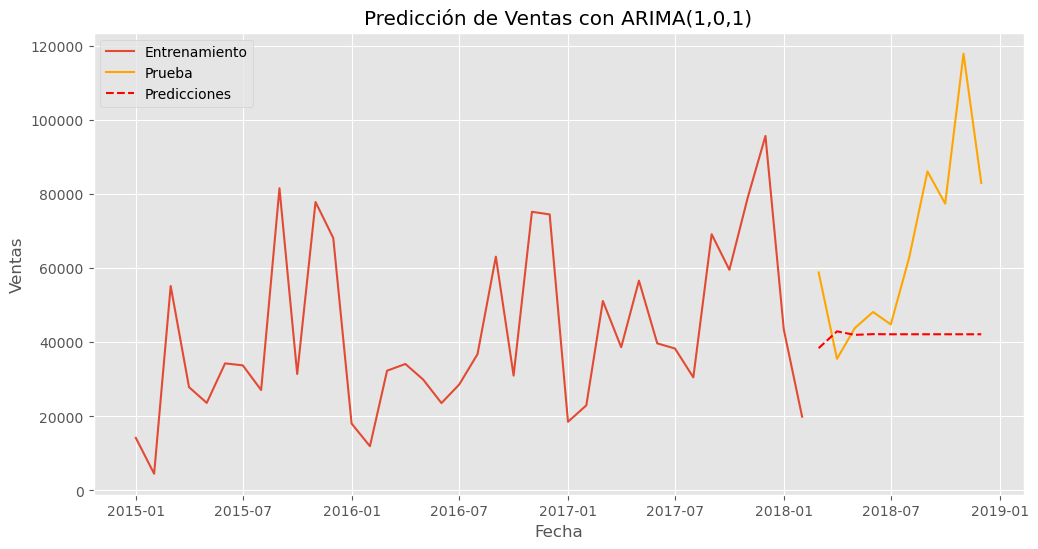

In [80]:
# Graficar las predicciones vs datos reales
plt.figure(figsize=(12,6))
plt.plot(train.index, train['Sales'], label="Entrenamiento")
plt.plot(test.index, test['Sales'], label="Prueba", color='orange')
plt.plot(test.index, predicciones, label="Predicciones", linestyle='dashed', color='red')
plt.legend()
plt.title("Predicción de Ventas con ARIMA(1,0,1)")
plt.xlabel("Fecha")
plt.ylabel("Ventas")
plt.grid(True)
plt.show()

In [ ]:
#concluciones:
#El modelo no captura la tendencia de crecimiento en los datos de prueba.
#El modelo ARIMA(1,0,1) predice valores constantes en la línea de predicción (rojo discontinua).
#Mientras que los valores reales de prueba (naranja) muestran un aumento significativo en ventas.
#Conclusión: El modelo no captura la tendencia creciente, modelo predice un valor medio constante
#ARIMA(1,0,1) no está ajustando la variabilidad observada en los datos.
#Esto sugiere que los términos AR y MA no son adecuados para capturar los cambios en la serie.
️#Fuerte diferencia entre valores reales y predicciones.
#Las ventas reales (línea naranja) fluctúan mucho, mientras que el modelo predice un valor plano.
#Esto indica que el modelo no es adecuado para capturar la estacionalidad y la tendencia de los datos.